In [46]:
%matplotlib inline
from wpimath.trajectory import TrajectoryConfig, TrajectoryGenerator
from wpimath.trajectory.constraint import CentripetalAccelerationConstraint
from wpimath.geometry import Pose2d, Rotation2d, Translation2d
import matplotlib.pyplot as plt

In [47]:
config = TrajectoryConfig(maxVelocity=1, maxAcceleration=2)

initial_pose = Pose2d(x=0, y=0, rotation=Rotation2d(0))
waypoints = [Translation2d(x=1, y=1), Translation2d(x=2, y=-1)]
final_pose = Pose2d(x=3, y=0, rotation=Rotation2d(0))

In [48]:
trajectory = TrajectoryGenerator.generateTrajectory(
    start=initial_pose,
    interiorWaypoints=waypoints,
    end=final_pose,
    config=config
    )

x = [state.pose.translation().x for state in trajectory.states()]
y = [state.pose.translation().y for state in trajectory.states()]
velocity = [state.velocity for state in trajectory.states()]
acceleration = [state.acceleration for state in trajectory.states()]
time = [state.t for state in trajectory.states()]

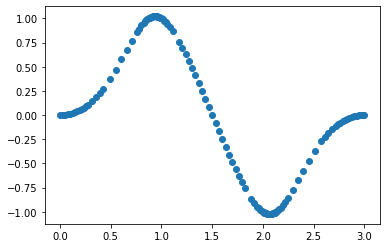

In [49]:
plt.scatter(x, y)
plt.show()

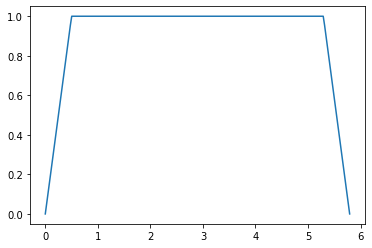

In [50]:
plt.plot(time, velocity)
plt.show()

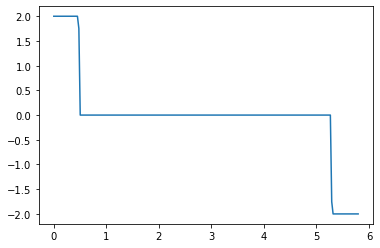

In [51]:
plt.plot(time, acceleration)
plt.show()

In [52]:
centripetal_constraint = CentripetalAccelerationConstraint(maxCentripetalAcceleration=1)
config.addConstraint(centripetal_constraint)

trajectory = TrajectoryGenerator.generateTrajectory(
    start=initial_pose,
    interiorWaypoints=waypoints,
    end=final_pose,
    config=config
    )

x = [state.pose.translation().x for state in trajectory.states()]
y = [state.pose.translation().y for state in trajectory.states()]
velocity = [state.velocity for state in trajectory.states()]
acceleration = [state.acceleration for state in trajectory.states()]
time = [state.t for state in trajectory.states()]



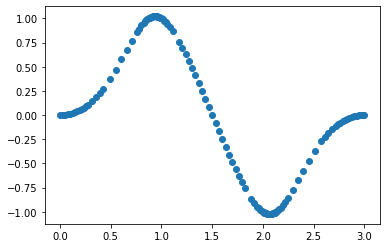

In [53]:
plt.scatter(x, y)
plt.show()

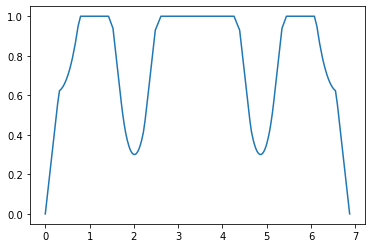

In [54]:
plt.plot(time, velocity)
plt.show()

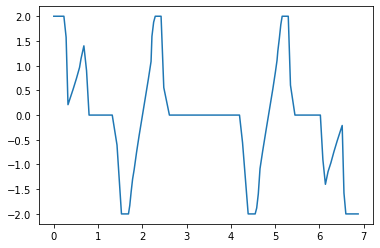

In [55]:
plt.plot(time, acceleration)
plt.show()

In [56]:
trajectory.states()[100]

Trajectory.State(t=5.004332, velocity=0.357563, acceleration=0.870176, pose=Pose2d(Translation2d(x=2.108226, y=-1.011694), Rotation2d(0.451807)), curvature=7.821608)

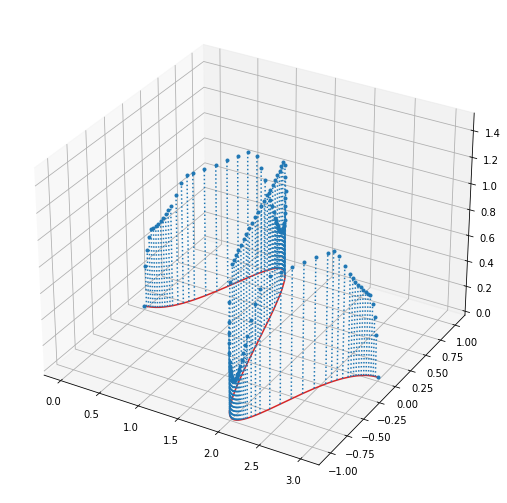

In [63]:
plt.close()
fig= plt.figure(figsize=(16, 9))
ax= fig.add_subplot(projection= '3d')
ax.set_zlim([0, 1.5])
ax.stem(x, y, velocity, linefmt=':', markerfmt='.')
fig.savefig("3D.svg")